In [1]:
from chebpy2 import Chebfun2, Quasimatrix
import chebpy as cp
import numpy as np

In [2]:
def green(x,s):
    g = 0
    g = (x <= s) * (x * (1-s)) + (x > s) * (s * (1-x))
    return g

In [3]:
prefx = cp.core.settings.ChebPreferences()
prefy = cp.core.settings.ChebPreferences()
prefx.eps = 1e-6
prefy.eps = 1e-6

In [4]:
%%time
c = Chebfun2(green, domain = [0, 1, 0, 1], prefx = prefx, prefy = prefy)

CPU times: user 8.85 s, sys: 3.09 s, total: 11.9 s
Wall time: 11.9 s


In [9]:
n = 1
A = c.cols[:,:n]

In [10]:
%%time
z = A.T * A

CPU times: user 34.6 ms, sys: 4.91 ms, total: 39.5 ms
Wall time: 39.1 ms


In [12]:
import time

nn = np.linspace(1,20,20).astype(int)
tt = np.zeros(nn.shape)
for n in nn-1:
    A = c.cols[:,:n]
    start = time.time()
    z = A.T * A
    tt[n] = time.time()-start

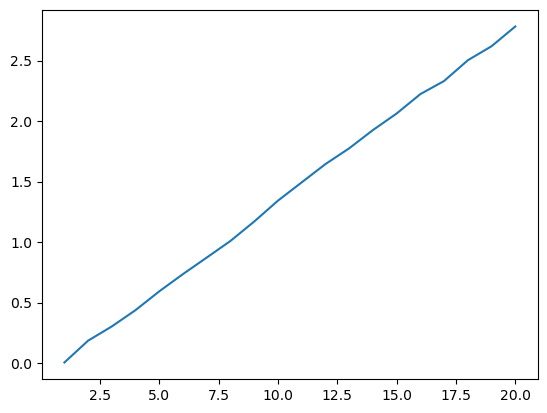

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(nn,np.sqrt(tt))

In [36]:
%%time
z = A.T * A

CPU times: user 39.4 ms, sys: 4.64 ms, total: 44 ms
Wall time: 45 ms


In [37]:
%%time
z = B.T * B

CPU times: user 2.01 s, sys: 78 ms, total: 2.08 s
Wall time: 2.09 s


In [38]:
2.09/0.045

46.44444444444444

In [32]:
2.08/(0.0375)

55.46666666666667

In [9]:
%%time
z = A * B

CPU times: user 2.02 s, sys: 73.5 ms, total: 2.09 s
Wall time: 2.09 s


In [ ]:
c.cols.data

In [7]:
c.cols.shape

(inf, 513)

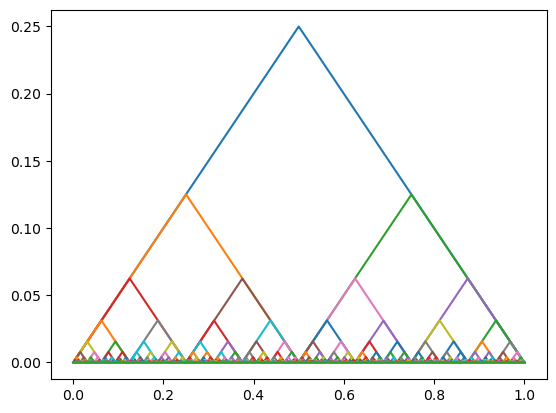

In [7]:
c.cols[:,:].plot()

In [13]:
y = (c.cols.data + c.cols.data)

In [14]:
y.shape

(513,)